## Notebook E-tivity 2 CE4021 Linear Regression

Student name: Peter O'Mahony

Student ID: 8361967

<hr style="border:2px solid gray"> </hr>

_The goal of this task is to create your own implementation of linear regression using your own functions to implement the required matrix manipulations._
_Inspect the reference implementation and create functions for all the matrix manipulations required to implement the linear regression algorithm._

_Use these matrix manipulation functions in a new function that takes the data (X) and outputs (y) and returns the least squares estimate of the linear regression weight vector. Call this function 'fit'._
_Create a second function that uses the weights found by the fit method and a number of data points X to create new predictions. Call this function 'predict'._
_Finally, create a function that returns the weights found by the fit method. Call this function 'get_params'.

_Please note:_

_The function to calculate the inverse of a matrix need only be applicable to 2x2 matrices. All other functions should be able to handle matrices of arbitrary sizes._
_Error handling is very useful to prevent matrices of incorrect sizes resulting in run-time errors._
_Add appropriate comments (doc strings) to the functions you have created._
_At this stage you should not create a class to encapsulate your code. Please add this element, if time permits, as part of your reflection._

## Initial Thoughts
What are the data referring to?

I can write a Transpose and Dot function but what is the inverse?

What does np.linalg.inv do? It calculates the inverse. 

Why does the sames linreg_weights function have nested dots and a transpose?

## Later Thoughts
Somewhere in here implies that to estimate the least squares we use a formula like:
$$ (X^T \cdot X)^{-1} \cdot X^T \cdot y$$
and I found that in Pep's Lessons video.  It's not clear to me how that formula is derived but I can precipiate from it that there are a few matrix manipulations/functions needed to use the formula:
1. Transpose
2. Dot
3. Inverse

and it appears that that is the scope of Part 1 of this E-tivity.  I'm fascinated that there is no sign of a square root or Pythagorus in this and yet we are going to evaluate distances from a line.  A shake of magic no doubt.

## Approach
I am going to write the functions noted above and then define a collection of tests that uses both them and the numpy versions and compares the results.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<hr style="border:2px solid gray"> </hr>

## Reference Implementation

In [2]:
def linreg_weights(X,y):
    # Calculation of weights using pseudo-inverse. Note that X needs to contain the bias of 1
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [3]:
def linreg_predict(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [4]:
def fit():
    pass # placeholder

In [5]:
def predict():
    pass # placeholder

In [6]:
def get_params():
    pass # placeholder

In [114]:
def my_transpose(matrix: list) -> list:
    return [[arr[row][col] for row in range(0,len(arr))] for col in range(0,len(arr[0]))]

In [123]:
arr = [[1,2,3,4,5],[6,-1,8,9,10]]
np_arr = np.array(arr)

print('arr=',arr)
print('np_arr=',np_arr)
print('myT  arr=',np.array(my_transpose(arr)))
print('npT  arr=',np_arr.T)
print(np.array_equal(np.array(my_transpose(arr)),np_arr.T))


arr= [[1, 2, 3, 4, 5], [6, -1, 8, 9, 10]]
np_arr= [[ 1  2  3  4  5]
 [ 6 -1  8  9 10]]
myT  arr= [[ 1  6]
 [ 2 -1]
 [ 3  8]
 [ 4  9]
 [ 5 10]]
npT  arr= [[ 1  6]
 [ 2 -1]
 [ 3  8]
 [ 4  9]
 [ 5 10]]
True


In [ ]:
def dim(a): # from https://stackoverflow.com/questions/17531796/find-the-dimensions-of-a-multidimensional-python-array
    if not type(a) == list:
        return []
    return [len(a)] + dim(a[0])

In [293]:
def my_dot(M1: list,M2: list) -> list:
    # check that M1 rows = M2 cols otherwise raise an error
    dim_M1 = dim(M1)
    dim_M2 = dim(M2)
    print('M1=',dim_M1,'M2=',dim_M2)
    if (len(dim_M1) != len(dim_M2)):
        print("Invalid sizes", dim_M1,len(dim_M1),dim_M2,len(dim_M2))
        
    #if (dim_M1[1] != dim_M2[0]):
    if (len(M1[0]) != len(M2)):
        print(f"Cols in M1 ({dim_M1[1]}) must match Rows in M2 ({dim_M2[0]})")
        
    C = [['' for row in range(0,len(M2[0]))] for col in range(0,len(M1))] # initialise array
    D = [[0 for row in range(0,len(M2[0]))] for col in range(0,len(M1))] # initialise array
    #print(C,dim(C))
   
    for row in range(0,len(M1)): # rows from M1
        for col in range(0,len(M2[0])): # cols from M2
  #          for r1 in range(0,len(M2[0])):
                for term in range(0,len(M2)):
                    #term=0
                    #print(f"\nM1[{row}][{term}]={M1[row][term]}") # here we calc sum of products
                    #print(f"\nM2[{row}][{term}]={M2[row][term]}") # here we calc sum of products
                    C[row][col] += f" + A{row+1}{term+1}.B{term+1}{col+1}" # M1[row][col] * M2[row][col]
                    D[row][col] += M1[row][term] * M2[term][col]
    print(C)
    return D


In [297]:
arr1 = [[1, 2], [3, 4]]
#arr1 = [[1, 2, 3]]
arr2 = [[5,6,7,8], [9,10,11,12]]
#arr2 = [[5,6], [7,8]]
#arr2 = [[4], [5], [6]]

arr1 = [[2,2],[4,4]]
arr2 = [[1,2],[3,1]]
print(my_dot(arr1,arr2))
print(np.array(arr1).dot(np.array(arr2)))

M1= [2, 2] M2= [2, 2]
[[' + A11.B11 + A12.B21', ' + A11.B12 + A12.B22'], [' + A21.B11 + A22.B21', ' + A21.B12 + A22.B22']]
[[8, 6], [16, 12]]
[[ 8  6]
 [16 12]]


In [290]:
def pom_transpose(matrix: np.array) -> np.array:
    #print('matrix is\n',matrix,'\n has shape ',matrix.shape)
    trans = matrix.reshape(matrix.shape[1],matrix.shape[0]).copy()
    trans[1][1] = 999
    #print('matrix is\n',matrix,'\n has shape ',matrix.shape)
    
    #print('trans is\n',trans,'\n has shape ',trans.shape)
    #print('max is',trans[2][1])
    for i in range(0,matrix.shape[0]):
        for j in range(0,matrix.shape[1]):
            #print(f"{i},{j}", end='')
            #print(f"=> {matrix[i,j]}")
            trans[j][i] = matrix[i][j]
    #print('NumPy gives:\n',matrix.T)
    return trans

arr = np.array([[1,2,3,4,5],[6,7,8,9,10]])
print('shape',arr.shape)
"""
res = pom_transpose(arr)
print('we give:\n',res)
comp = np.array_equal(res,arr.T)
print(comp,res.shape,arr.T.shape)
print(res+arr.T)
"""
arrT  = pom_transpose(arr)
arrT2 = pom_transpose(arrT)
comp  = np.array_equal(arr,arrT2)
print(comp)


shape (2, 5)
True


In [10]:
def pom_dot(matrix1: np.array, matrix2: np.array) -> np.array:
    """
    Multiply m1 by m2
    
    Validation: check that the shape of m1 transposed is the shape of m2 i.e. mxn => nxm
    """
    
    for i in range(0,matrix1.shape[0]):
        for j in range(0,matrix1.shape[1]):
            print(f"[{i}][{j}] => ",end='')
            print(f"{matrix1[i][j]}, {matrix2[i][j]}")

print(arr)
arr2 = np.ones((2,5))
arr2 *= 2
print(arr2)
pom_dot(arr,arr2)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
[[2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]]
[0][0] => 1, 2.0
[0][1] => 2, 2.0
[0][2] => 3, 2.0
[0][3] => 4, 2.0
[0][4] => 5, 2.0
[1][0] => 6, 2.0
[1][1] => 7, 2.0
[1][2] => 8, 2.0
[1][3] => 9, 2.0
[1][4] => 10, 2.0


Load data from file (including bias of 1)

In [11]:
# junk - experiments in learning
pom = np.array([[1,2],[5,6]])
jak = np.array([[2,0],[0,-2]])
print('pom=',pom)
print('transposed=',pom.T)
print('dot=',pom.T.dot(jak))

pom= [[1 2]
 [5 6]]
transposed= [[1 5]
 [2 6]]
dot= [[  2 -10]
 [  4 -12]]


In [12]:
zed = np.sin(pom)
print(zed)
x = np.array([3, 1, 2])
print(np.argsort(x))
for n in np.argsort(x):
    print(n,x[n]) 

[[ 0.84147098  0.90929743]
 [-0.95892427 -0.2794155 ]]
[1 2 0]
1 1
2 2
0 3


In [13]:
data = np.loadtxt('lr_data.csv', delimiter=',')
X = data[:,0:2]
print('data[0:24,2]',data[0:24,2])  #pom just column 2
#print('range(0,len(data[:,2]))',range(0,len(data[:,2]))) # length of column 2 (why would this be diff to len(data))
#print('len(data[:,2])',len(data)) # length of column 2 (why would this be diff to )
y= [[data[i,2]] for i in range(0,len(data[:,2]))] # i=0 to 24 so y = data[0:24,2]?

print('X=',X)   # X is array of pairs of [1, n] where n is the 2nd column of data
print('\ny=',y) # y is the third column of data in a 2d array
print('\ny"=',data[0:24,2]) # y is the third columns of data

print('\ndata[0:24,2]',list(data[0:24,2]))
#print('X.t=',X.T)

data[0:24,2] [1464. 1394. 1357. 1293. 1256. 1254. 1234. 1195. 1159. 1167. 1130. 1075.
 1047.  965.  943.  958.  971.  949.  884.  866.  876.  822.  704.  719.]
X= [[1.   2.75]
 [1.   2.5 ]
 [1.   2.5 ]
 [1.   2.5 ]
 [1.   2.5 ]
 [1.   2.5 ]
 [1.   2.5 ]
 [1.   2.25]
 [1.   2.25]
 [1.   2.25]
 [1.   2.  ]
 [1.   2.  ]
 [1.   2.  ]
 [1.   1.75]
 [1.   1.75]
 [1.   1.75]
 [1.   1.75]
 [1.   1.75]
 [1.   1.75]
 [1.   1.75]
 [1.   1.75]
 [1.   1.75]
 [1.   1.75]
 [1.   1.75]]

y= [[1464.0], [1394.0], [1357.0], [1293.0], [1256.0], [1254.0], [1234.0], [1195.0], [1159.0], [1167.0], [1130.0], [1075.0], [1047.0], [965.0], [943.0], [958.0], [971.0], [949.0], [884.0], [866.0], [876.0], [822.0], [704.0], [719.0]]

y"= [1464. 1394. 1357. 1293. 1256. 1254. 1234. 1195. 1159. 1167. 1130. 1075.
 1047.  965.  943.  958.  971.  949.  884.  866.  876.  822.  704.  719.]

data[0:24,2] [1464.0, 1394.0, 1357.0, 1293.0, 1256.0, 1254.0, 1234.0, 1195.0, 1159.0, 1167.0, 1130.0, 1075.0, 1047.0, 965.0, 943.0, 958.0

In [14]:
a = np.arange(12)
b = range(12)
print('a=',a)
print('b=',b)
a = a**2
print('squared',a)


a= [ 0  1  2  3  4  5  6  7  8  9 10 11]
b= range(0, 12)
squared [  0   1   4   9  16  25  36  49  64  81 100 121]


Apply data to linear regression algorithm to obtain weights

In [15]:
weights = linreg_weights(X,y)
weights

array([[-99.46431881],
       [564.20389249]])

(0.0, 3.0, -100.0, 1500.0)

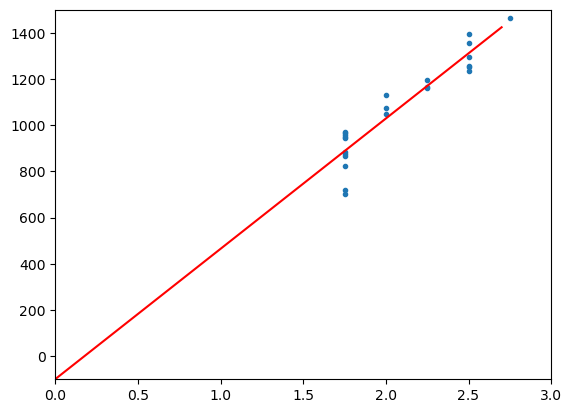

In [16]:
ind = np.arange(0,2.8,0.1)
plt.plot(X[:,1],y,'.')
plt.plot(ind, ind*weights[1]+weights[0],'r')
plt.axis([0, 3, -100, 1500])

<hr style="border:2px solid gray"> </hr>

## Task

You may add as many cells as you require to complete this task.

<hr style="border:2px solid gray"> </hr>

## Reflection

Write your reflection in below cell.